# 공정능력지수 (Process Capability Index, Cpk)

공정능력지수 (Process Capability Index, Cpk)는 제조 공정의 능력을 나타내는 지표  
공정이 규격 한계 내에서 얼마나 일관되게 제품을 생산하는지 평가하는 데 사용됩니다.   
공정능력지수를 계산하기 위해서는 목표 규격 (Specification Limits), 평균 (Mean), 그리고 표준편차 (Standard Deviation)가 필요합니다.  

다음은 샘플 데이터를 생성하고, 각 제조사의 레미콘 품질에 대한 공정능력지수를 계산하는 파이썬 코드입니다.  
 
샘플 데이터를 생성합니다.  
각 제조사별로 평균과 표준편차를 계산합니다.  
공정능력지수 (Cpk)를 계산합니다.  

In [19]:
import numpy as np
import pandas as pd

# 샘플 데이터 생성
np.random.seed(42)  # 재현성을 위해 랜덤 시드 설정
manufacturers = ['A', 'B', 'C']
num_samples = 300

# 각 제조사별로 무작위 데이터를 생성합니다.
data = {
    'Manufacturer': np.random.choice(manufacturers, num_samples),
    'Strength': np.random.normal(25, 2, num_samples)  # 평균 25, 표준편차 3인 정규분포
}

df = pd.DataFrame(data)

# 품질 목표 규격 (Specification Limits)
USL = 30  # Upper Specification Limit
LSL = 20  # Lower Specification Limit

# 공정능력지수 (Cpk) 계산 함수
def calculate_cpk(mean, std, USL, LSL):
    cpu = (USL - mean) / (3 * std)
    cpl = (mean - LSL) / (3 * std)
    return min(cpu, cpl)

# 각 제조사별로 평균, 표준편차 및 Cpk 계산
results = []
for manufacturer in manufacturers:
    subset = df[df['Manufacturer'] == manufacturer]
    mean_strength = subset['Strength'].mean()
    std_strength = subset['Strength'].std()
    cpk = calculate_cpk(mean_strength, std_strength, USL, LSL)
    results.append({
        'Manufacturer': manufacturer,
        'Mean Strength': mean_strength,
        'Standard Deviation': std_strength,
        'Cpk': cpk
    })

results_df = pd.DataFrame(results)

print(results_df)


  Manufacturer  Mean Strength  Standard Deviation       Cpk
0            A      24.897518            1.888804  0.864307
1            B      24.965375            2.007746  0.824370
2            C      25.160460            2.333339  0.691361


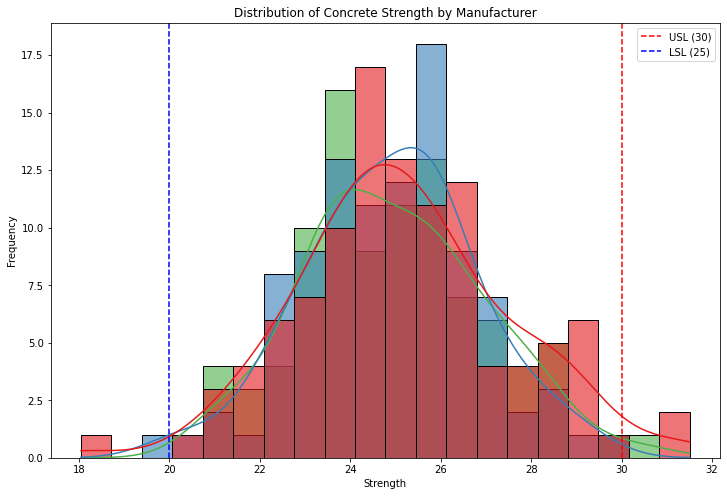

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 제조사별 강도 분포 시각화
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Strength', hue='Manufacturer', kde=True, bins=20, palette='Set1', alpha=0.6)

# USL과 LSL을 그래프에 추가
plt.axvline(USL, color='red', linestyle='--', label='USL (30)')
plt.axvline(LSL, color='blue', linestyle='--', label='LSL (25)')

# 그래프 제목 및 레이블 설정
plt.title('Distribution of Concrete Strength by Manufacturer')
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.legend()

# 그래프 출력
plt.show()

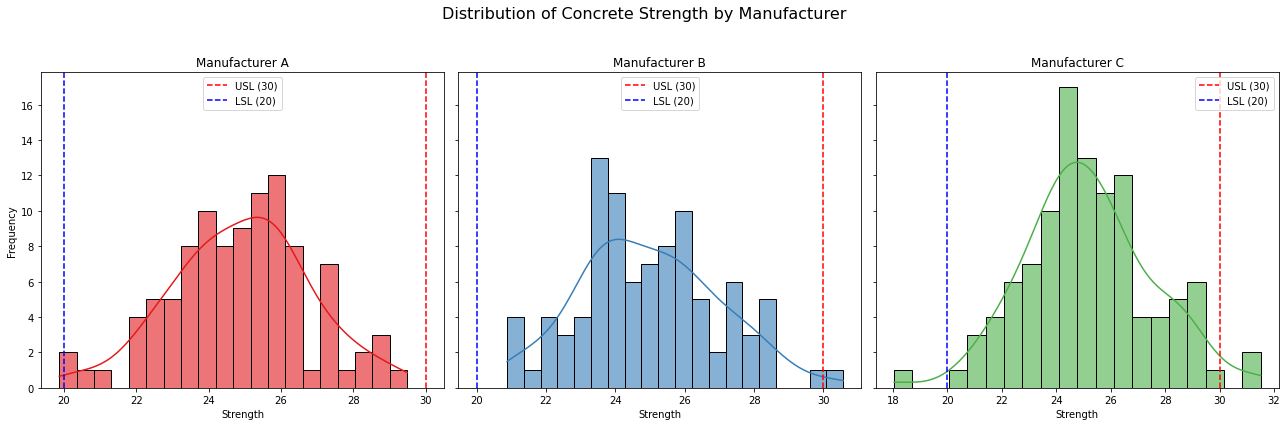

In [21]:
# 제조사별 강도 분포를 1x3 서브플롯으로 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# 색상 팔레트 설정
palette = sns.color_palette('Set1')

for i, manufacturer in enumerate(manufacturers):
    subset = df[df['Manufacturer'] == manufacturer]
    sns.histplot(subset['Strength'], kde=True, bins=20, color=palette[i], ax=axes[i], alpha=0.6)
    
    # USL과 LSL을 서브플롯에 추가
    axes[i].axvline(USL, color='red', linestyle='--', label='USL (30)')
    axes[i].axvline(LSL, color='blue', linestyle='--', label='LSL (20)')
    
    # 서브플롯 제목 및 레이블 설정
    axes[i].set_title(f'Manufacturer {manufacturer}')
    axes[i].set_xlabel('Strength')
    axes[i].set_ylabel('Frequency' if i == 0 else '')
    axes[i].legend()

# 그래프 전체 제목 설정
plt.suptitle('Distribution of Concrete Strength by Manufacturer', fontsize=16)

# 그래프 출력
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
